# hierarchial example:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy 


In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

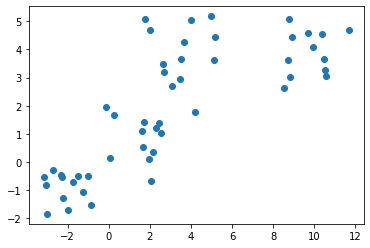

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 


In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')


In [5]:
agglom.fit(X1,y1)


AgglomerativeClustering(linkage='average', n_clusters=4)

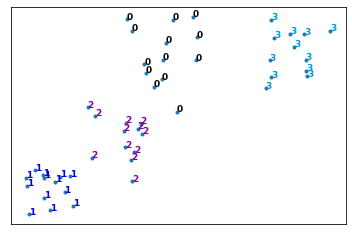

In [6]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

## lets create the Dendrogram now

#### first we calculate our distances between each data point, since each of them are consider as a cluster now because we are using agglomerative:

In [7]:
dist_matrix = distance_matrix(X1,X1)
dist_matrix


array([[0.        , 0.54836846, 0.17305752, ..., 0.53560774, 0.24617415,
        0.61577859],
       [0.54836846, 0.        , 0.65464395, ..., 0.06085782, 0.30230057,
        0.07269919],
       [0.17305752, 0.65464395, 0.        , ..., 0.62806084, 0.364552  ,
        0.71442082],
       ...,
       [0.53560774, 0.06085782, 0.62806084, ..., 0.        , 0.29119257,
        0.08795497],
       [0.24617415, 0.30230057, 0.364552  , ..., 0.29119257, 0.        ,
        0.36973296],
       [0.61577859, 0.07269919, 0.71442082, ..., 0.08795497, 0.36973296,
        0.        ]])

## but the dist_matrix is only for single data points, we need to calculate the distances between clusters now.

#### we can use scipy.cluster.hierarchy.linkage :  

this function can calculate the distance in one of the method we list in previous module as 'method':
- method=’single’
    - Single Linkage also known as the Nearest Point Algorithm

- method='complete'
    - Complete Linkage also known by the Farthest Point Algorithm or Voor Hees Algorithm

- method='average'
    - Average Linkage this is also called the UPGMA algorithm

- method='centroid'
    - Centroid Linkage This is also known as the UPGMC algorithm

- etc
    - there are also some other methods to do this:
    <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html"> scipy document </a>


In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')

/tmp/ipykernel_46762/3518085107.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


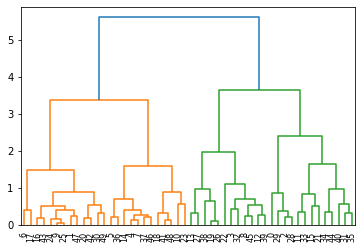

In [9]:
dendro = hierarchy.dendrogram(Z)
